# A Plot of $k_{obs}$ vs. $\%H_2SO_4$ or $H_0$

This code will create the figure 2 in the discussion that plots $k_{obs}$ vs. $\% H_2SO_4$ and $\log{k_{obs}}$ vs $0.62H_0$ 

In [1]:
###################################################
### Create Interpolation Function for H0 from %H2SO4
###################################################

### This function below could be in an external library that you call in your own program.

def MakeInterpolationFunctionForH0inH2SO4byPercentWt():
    Data_File_Name = "02_H0_H2SO4_Tickle_1970.csv"

    import pandas as pd
    pd.options.mode.chained_assignment = None    # no warning message and no exception is raised

    import numpy as np
    from scipy.interpolate import make_smoothing_spline               # A function for interpolating a plot using a Bspline algorithm. Returns an interpolation function.
    
    #github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_30/data/"
    github_location = "./data/"
        
    Filename = github_location + Data_File_Name
    
    df = pd.read_csv(Filename, 
                     delimiter = ",", 
                     skipinitialspace=True, 
                     comment = "#") 
    
    
    x = df["%H2SO4"]
    y = df["H0"]
    
    interpolation = make_smoothing_spline(x, y,      ### The x and y data
                                          w=None,    ### A list of weights for each point (default = None)
                                          lam=0.1)  ### A factor for the degree of smoothing. Change this to change the smoothness.
    
    return(interpolation)

###################################################
### call the function to create an interpolator for activity H2O in H2SO4
###################################################

interpolator = MakeInterpolationFunctionForH0inH2SO4byPercentWt()

###################################################
### An example of using the inerpolation function that you just created
###################################################

percentH2SO4 = 100

H0Value = interpolator(percentH2SO4)

#print(f"The H0 in {percentH2SO4}% H2SO4 is {H0Value:0.3f}")


In [2]:
##############################################################
### Set up libraries and global variables
##############################################################


import pandas as pd
pd.options.mode.chained_assignment = None    # no warning message and no exception is raised

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit
from scipy.stats import linregress

from statsmodels.nonparametric.smoothers_lowess import lowess     # A function for interpolating a plot using the locally weighed scatterplot smoothing method. Returns smoothed x,y points
from scipy.interpolate import CubicSpline                         # A function for interpolating a plot using the cubic spline method. Returns an interpolation function.
from scipy.interpolate import interp1d                            # A function for interpolating a plot using the connect-the-dots method. Returns an interpolation function.
from scipy.interpolate import make_smoothing_spline               # A function for interpolating a plot using a Bspline algorithm. Returns an interpolation function.

from matplotlib.patches import PathPatch
from matplotlib.path import Path


#github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_30/data/"
github_location = "./data/"
github_H0_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_08/data/H0_data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

molwtH2SO4 = 98.08
molwtH2O = 18.0
densityH2SO4 = 1.83
densityH2O = 1.000

### interpolation = interp1d(x1, y1, kind='linear')
### interpolation = CubicSpline(x1, y1)
### interpolation = scipy.interpolate.make_smoothing_spline(x1, y1, w=None, lam=0.03)



In [21]:
##############################################################
### Import the data and perform calculations
##############################################################

Data_File_Name = "Yates_Table1.csv"

Filename = github_location + Data_File_Name

df = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="Substituent", 
                 comment = "#") 
#display(df)

df1 = (df.loc[df['Ester'] == 'MeOAc'])   ### Select only the MeOAc data



##############################################################
### Perform calculations
##############################################################

df1["kobs"] = df1["kobs"] * 1E-2 * 60    # convert from 10^-2 min^-1 to s^-1

PercentH2SO4 = df1["%H2SO4"]
molesH2SO4 = PercentH2SO4 / molwtH2SO4
PercentH2O = 100 - PercentH2SO4
molesH2O = PercentH2O / molwtH2O
total_moles = molesH2SO4 + molesH2O
mole_fraction_H2SO4 = molesH2SO4 / total_moles

df1["X_H2SO4"] = mole_fraction_H2SO4

interpolator = MakeInterpolationFunctionForH0inH2SO4byPercentWt()
df1["H0"] = interpolator(df1["%H2SO4"])





m = 0.62
df1["HS"] = df1["H0"] * m

df1["log_k_obs"] = np.log10(df1["kobs"]) - 2

display(df1.head(3))




,Ester,%H2SO4,kobs,X_H2SO4,H0,HS,log_k_obs
0,MeOAc,14.1,0.900,0.029243,-0.597414,-0.370397,-2.045757
1,MeOAc,20.7,1.566,0.045716,-1.040195,-0.644921,-1.805208
2,MeOAc,28.3,2.532,0.067544,-1.509841,-0.936101,-1.596536


,Ester,%H2SO4,kobs,X_H2SO4,H0,HS,log_k_obs
0,MeOAc,14.1,0.9000,0.029243,-0.597414,-0.370397,-2.045757
1,MeOAc,20.7,1.5660,0.045716,-1.040195,-0.644921,-1.805208
2,MeOAc,28.3,2.5320,0.067544,-1.509841,-0.936101,-1.596536
3,MeOAc,34.8,3.8460,0.089215,-2.000013,-1.240008,-1.414991
4,MeOAc,40.4,4.8840,0.110638,-2.419997,-1.500398,-1.311224
5,MeOAc,45.4,6.2400,0.132397,-2.794364,-1.732506,-1.204815
6,MeOAc,50.2,6.8400,0.156117,-3.232965,-2.004438,-1.164944
7,MeOAc,55.2,7.9800,0.184424,-3.780673,-2.344017,-1.097997
8,MeOAc,60.4,8.2800,0.218701,-4.399864,-2.727916,-1.081970
9,MeOAc,65.2,7.1400,0.255866,-4.997463,-3.098427,-1.146302


In [8]:
Data_File_Name = "01_Giauque_Table9_activityH2OinH2SO4.csv"

##############################################################
### Import the data
##############################################################

Filename = github_location + Data_File_Name

df2 = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="Substituent", 
                 comment = "#") 

#display(df1)

##############################################################
### Perform calculations
##############################################################

molal = df2["conc H2SO4 / m"]
mass_add_to_1_kg_water = molal * molwtH2SO4
total_mass_solution = mass_add_to_1_kg_water + 1000
percent_H2SO4 = mass_add_to_1_kg_water / total_mass_solution * 100

df2["%H2SO4"] = percent_H2SO4
df2["X_H2SO4"] = molal / (molal + 1000/molwtH20)

interpolator = MakeInterpolationFunctionForH0inH2SO4byPercentWt()
df2["H0"] = interpolator(df2["%H2SO4"])

m = 0.62
df2["HS"] = df2["H0"] * m


display(df2.tail(3))

,conc H2SO4 / m,a_H2O,gamma_H2SO4,%H2SO4,X_H2SO4,H0,HS
33,400,7.870000e-06,2.19,97.514416,0.878049,-10.124079,-6.276929
34,500,5.200000e-06,1.78,98.001599,0.900000,-10.220340,-6.336611
35,1000,1.500000e-07,0.92,98.990715,0.947368,-10.415807,-6.457800


[ 8.93195396  8.94195396  8.95195396 ... 98.97195396 98.98195396
 98.99195396] [-6.91974822e-01 -6.94575920e-01 -6.97183530e-01 ... -1.27885836e+03
 -1.27924978e+03 -1.27964129e+03]
[ 8.93195396  8.94195396  8.95195396 ... 98.97195396 98.98195396
 98.99195396] [9.62200000e-01 9.62140945e-01 9.62081891e-01 ... 2.45100059e-07
 1.94408644e-07 1.43717425e-07]


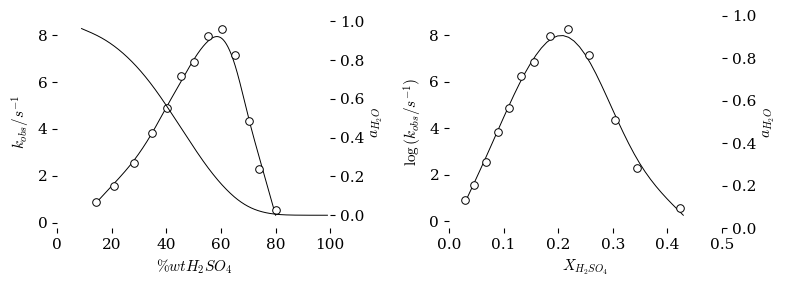

In [48]:
###################################################
### Get the data
###################################################

x = df1["%H2SO4"]
y = df1["kobs"]

x1 = df1["X_H2SO4"]
y1 = df1["kobs"]

###################################################
### Interpolate the data
###################################################

### Using a smoothing interpolation function that returns a Bspline function
xs = x
ys = y
if True:
       y_lowess = lowess(y, x, 
                         frac=0.43, 
                         it=0, 
                         delta=0.0, 
                         xvals=None, 
                         is_sorted=False, 
                         missing='drop', 
                         return_sorted=True)
       xs = y_lowess[:,0]
       ys = y_lowess[:,1]

interpolation = make_smoothing_spline(xs, ys,      ### The x and y data
                                      w=None,    ### A list of weights for each point (default = None)
                                      lam=0.5)  ### A factor for the degree of smoothing. Change this to change the smoothness.

step = 0.01
x_smooth = np.arange(np.min(x), np.max(x)+step, step)
y_smooth = interpolation(x_smooth)

interpolation1 = make_smoothing_spline(x1, y1,      ### The x and y data
                                       w=None,    ### A list of weights for each point (default = None)
                                       lam=0.00003)  ### A factor for the degree of smoothing. Change this to change the smoothness.
step = 0.01
x1_smooth = np.arange(np.min(x1), np.max(x1)+step, step)
y1_smooth = interpolation1(x1_smooth)





###################################################
### Set up labels for plots
###################################################

x_label = "$\%wt {H_2SO_4}$"
y_label = "$k_{obs} / s^{-1}$"

x1_label = "$X_{H_2SO_4}$"
y_label = "$k_{obs} / s^{-1}$"
#y1_label = "$\log{(k_{obs} / s^{-1})}$"


Title0 = "$H_0$ vs. %wt $H_2SO_4$"
Title0HR = "$H_R$ vs. %wt $H_2SO_4$"

Title1 = "Expanded Region"

###################################################
### Create figure for plot
###################################################

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))  
ax2 = ax[0].twinx()
ax3 = ax[1].twinx()


###################################################
### Make the first plot (plot 0)
###################################################

ax[0].set(
#          title = Title0,       
          ylabel=y_label, 
          xlabel=x_label,                
          xlim=[0,100],                  
#          ylim=[-3.7,-2.7]
       )
ax[0].margins(x=.07, y=.07, tight=True)
ax2.set(
#          title = Title0,       
          ylabel="$a_{H_2O}$", 
          xlabel=x_label,                
          xlim=[0,100],                  
#          ylim=[-3.7,-2.7]
       )
ax2.margins(x=.07, y=.07, tight=True)


if True:
       ax[0].scatter(x, y, 
                    marker = "o", 
                    s = 30, 
                    color = "white", 
                    edgecolors = "black", 
                    linewidths=0.7, 
                    zorder = 2)


ax[0].plot(x_smooth, y_smooth, "-", color = "black", linewidth=0.7, zorder = 1)

###################################################
### Make the second plot (plot 1)
###################################################

ax[1].set(
#          title = Title1,       
          ylabel=y1_label, 
          xlabel=x1_label,                
          xlim=[0,0.5],      ### Set axis limits to zoom in         
#          ylim=[-2.2,-0.8]
       )
ax[1].margins(x=.07, y=.07, tight=True)
ax3.set(
#          title = Title0,       
          ylabel="$a_{H_2O}$", 
          xlabel=x_label,                
          xlim=[0,0.5],                  
          ylim=[0,1]
       )
ax2.margins(x=.07, y=.07, tight=True)


ax[1].scatter(x1, y1, 
              marker = "o", 
              s = 30, 
              color = "white", 
              edgecolors = "black", 
              linewidths=0.7, 
              zorder = 2)


ax[1].plot(x1_smooth, y1_smooth, "-", color = "black", linewidth=0.7, zorder = 1)



########################################################
########################################################
########################################################
########################################################


xa = df2["%H2SO4"]
x1a = df2["X_H2SO4"]

ya = df2["a_H2O"]
y1a = df2["a_H2O"]

###################################################
### Interpolate Curve Spline
###################################################

interpolation = make_smoothing_spline(xa, ya,      ### The x and y data
                                      w=None,    ### A list of weights for each point (default = None)
                                      lam=0.00)  ### A factor for the degree of smoothing. Change this to change the smoothness.
step = 0.01
xa_smooth = np.arange(np.min(xa), np.max(xa)+step, step)
ya_smooth = interpolation(xa_smooth)

interpolation = make_smoothing_spline(x1a, y1a,      ### The x and y data
                                      w=None,    ### A list of weights for each point (default = None)
                                      lam=0.00)  ### A factor for the degree of smoothing. Change this to change the smoothness.
step = 0.01
x1a_smooth = np.arange(np.min(xa), np.max(xa)+step, step)
y1a_smooth = interpolation(x1a_smooth)

ax2.plot(xa_smooth, ya_smooth, "-", color = "black", linewidth=0.7, zorder = 1)
ax3.plot(x1a_smooth, y1a_smooth, "-", color = "black", linewidth=0.7, zorder = 1)

print(x1a_smooth, y1a_smooth)
print(xa_smooth, ya_smooth)


plt.savefig("fig2.pdf")
plt.show()





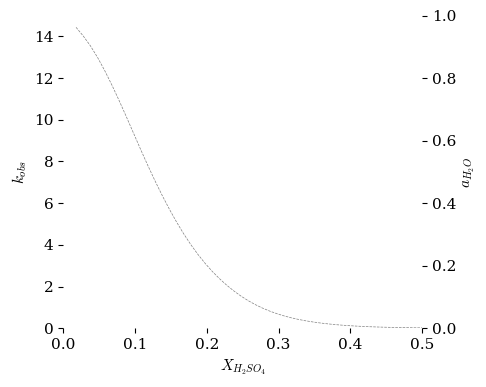

In [9]:
###################################################
### Get the data
###################################################


#xa = df2["%H2SO4"]
xa = df2["X_H2SO4"]

ya = df2["a_H2O"]

###################################################
### Interpolate Curve Spline
###################################################

interpolation = make_smoothing_spline(xa, ya,      ### The x and y data
                                      w=None,    ### A list of weights for each point (default = None)
                                      lam=0.00)  ### A factor for the degree of smoothing. Change this to change the smoothness.
step = 0.01
xa_smooth = np.arange(np.min(xa), np.max(xa)+step, step)
ya_smooth = interpolation(xa_smooth)

###################################################
### Create figure for plot
###################################################

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax2 = ax.twinx()

###################################################
### Plot Data points and curve
###################################################


x_label = "$X_{H_2SO_4}$"
y_label = "$k_{obs}$"

xH0_label = "$-0.62H_0$"
ya_label = "$a_{H_2O}$"


if True:                  # Set up axes for main plot
    ax.set(
#          title = Title1,       
          ylabel=y_label, 
          xlabel=x_label,                
          xlim=[0,0.5],      ### Set axis limits to zoom in         
          ylim=[0,15]
       )

if True:                  # Data points for kobs vs %H2SO4
    ax.scatter(x, y, 
              marker = "o", 
              s = 30, 
              color = "white", 
              edgecolors = "black", 
              linewidths=0.7, 
              zorder = 2)
if True:                  # White circle behind each data point
    ax.scatter(x, y, 
              marker = "o", 
              s = 90, 
              color = "white", 
#              edgecolors = "black", 
              linewidths=0.7, 
              zorder = 1)

ax.plot(x_smooth, y_smooth, "-", color = "black", linewidth=0.5, zorder = 0)

if True:                  # Set up axes for alternate plot
    ax2.set(
#          title = Title1,       
          ylabel=ya_label, 
          xlabel=x_label,                
#          xlim=[0,85],      ### Set axis limits to zoom in         
          ylim=[0,1]
       )


if False:                  # Data points for a_H2O vs %H2SO4
    ax2.scatter(xa, ya, 
               marker = "o", 
               s = 30, 
               color = "white", 
               edgecolors = "black", 
               linewidths=0.7, 
               zorder = 2)

ax2.plot(xa_smooth, ya_smooth, "--", color = "gray", linewidth=0.5, zorder = 0)   # line for a_H2O vs %H2SO4


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("twoaxesplot.pdf")

plt.show()





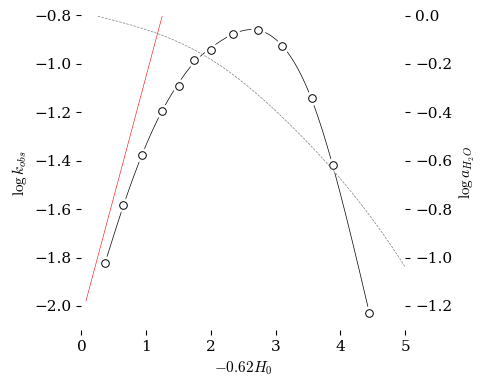

In [10]:
###################################################
### Get the data
###################################################


#xa = df2["%H2SO4"]
#xa = df2["X_H2SO4"]
xa = -df2["H0"]

ya = np.log10(df2["a_H2O"])

###################################################
### Interpolate Curve Spline
###################################################

interpolation = make_smoothing_spline(xa, ya,      ### The x and y data
                                      w=None,    ### A list of weights for each point (default = None)
                                      lam=0.2)  ### A factor for the degree of smoothing. Change this to change the smoothness.
step = 0.01
xa_smooth = np.arange(np.min(xa), np.max(xa)+step, step)
ya_smooth = interpolation(xa_smooth)

###################################################
### Create figure for plot
###################################################

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax2 = ax.twinx()

###################################################
### Plot Data points and curve
###################################################


x_label = "$\%wt {H_2SO_4}$"
y_label = "$\log{k_{obs}}$"

xH0_label = "$-0.62H_0$"
ya_label = "$\log{a_{H_2O}}$"


if True:                  # Set up axes for main plot
    ax.set(
#          title = Title1,       
          ylabel=y_label, 
          xlabel=xH0_label,                
          xlim=[0,5],      ### Set axis limits to zoom in         
          ylim=[-2.1,-0.8]
       )

if True:                  # Data points for kobs vs %H2SO4
    ax.scatter(x, y, 
              marker = "o", 
              s = 30, 
              color = "white", 
              edgecolors = "black", 
              linewidths=0.7, 
              zorder = 2)
if True:                  # White circle behind each data point
    ax.scatter(x, y, 
              marker = "o", 
              s = 90, 
              color = "white", 
#              edgecolors = "black", 
              linewidths=0.7, 
              zorder = 1)

ax.plot(x_smooth, y_smooth, "-", color = "black", linewidth=0.5, zorder = 0)

if True:                  # Set up axes for alternate plot
    ax2.set(
#          title = Title1,       
          ylabel=ya_label, 
          xlabel=x_label,                
#          xlim=[0,85],      ### Set axis limits to zoom in         
          ylim=[-1.3,0]
       )
ax.plot(x-.3, x-2.35, "-", color = "red", linewidth=0.4, zorder = 1)


if False:                  # Data points for a_H2O vs %H2SO4
    ax2.scatter(xa, ya, 
               marker = "o", 
               s = 30, 
               color = "white", 
               edgecolors = "black", 
               linewidths=0.7, 
               zorder = 2)

ax2.plot(xa_smooth, ya_smooth, "--", color = "gray", linewidth=0.5, zorder = 0)   # line for a_H2O vs %H2SO4


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("twoaxesplot.pdf")

plt.show()



